In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.ticker import MaxNLocator


In [89]:
# for testing
# mcfiles = ['../dsa_mc/testing.npy']
mcfiles = ['../dsa_mc/roots_95/roots_95_100k.npy']

# for different center of mass energies
# rs_arr = ['55', '65', '75', '85', '95', '105', '115']
# rs_arr = ['55', '95']
# mcfiles = [f'../dsa_mc/roots_{rs}/roots_{rs}_100k.npy' for rs in rs_arr]

# for different replicas
# mcfiles = [
#     f'../dsa_mc/roots_95/roots_95_100k.npy',
#     f'../dsa_mc/roots_95_trial2/roots_95_100k_trial2.npy',
#     f'../dsa_mc/roots_95_trial3/roots_95_100k_trial3.npy'
#           ]

columns = ['s', 'Q', 'x', 'delta', 'pT', 'z', 'y']
columns += ['denominator', 'numerator']
columns += ['cos(phi_kp)', 'cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']

mc_dfs = []
for ifile, mcfile in enumerate(mcfiles):
    mcdata = np.load(mcfile)
    mc_df = pd.DataFrame(mcdata, columns=columns)
    mc_df['t'] = mc_df['delta']**2
    mc_dfs.append(mc_df)


In [91]:
mc_dfs[0].tail()

,s,Q,x,delta,pT,z,y,denominator,numerator,cos(phi_kp),cos(phi_Dp),cos(phi_Dp)cos(phi_kp),sin(phi_Dp)sin(phi_kp),t
99995,9025.0,4.881033,0.006655,0.102334,14.116609,0.344454,0.396678,4442.824014,58.549093,6.008098,-0.638235,0.937367,-0.406228,0.010472
99996,9025.0,4.147511,0.003638,0.183099,10.117904,0.533254,0.523935,57460.398375,740.149879,-8.467803,1.849300,15.546866,-7.818810,0.033525
99997,9025.0,5.671607,0.005849,0.194238,5.393373,0.680071,0.609338,422763.240612,4598.083531,-77.244622,-125.800977,-66.167411,-9.543393,0.037728
99998,9025.0,5.503233,0.008995,0.195583,6.586082,0.246608,0.373059,127686.929097,1829.766534,84.684134,26.529103,-3.247585,-14.659227,0.038253
99999,9025.0,8.207419,0.007766,0.148706,4.331584,0.849782,0.961116,434759.245050,12152.843182,81.607556,-556.601808,-41.253131,12.405115,0.022113


In [93]:
# function to plot histograms

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'


def plot_histogram(datasets, df, corrs, constraints={}, **options):

    asp_ratio = 4/3
    psize = 5

    fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))
        
    colors = ['black', 'red', 'blue', 'green', 'gray', 'orange', 'pink']
    linestyles = ['-', '-', '-', '-', '-', '-', '-']

    lumis = [data['lumi'] for data in datasets]
    if len(set(lumis)) == 1: same_lumi = True
    else: same_lumi = False

    for idata, data in enumerate(datasets):
        for ic, corr in enumerate(corrs):

            no_label = False
            if len(datasets) > 1:
                if len(corrs) > 1: raise ValueError('Should not plot multiple correlations with multiple datasets')
                label = options.get('labels')[idata]
                ilab = idata
            
            elif len(corrs) > 1:
                label = options.get('labels')[ic]
                ilab = ic
                    
            else:
                ilab = 0
                label = None


            if options.get('plot_ratio', True):
                
                ax.errorbar(
                    data[corr]['bin centers'], data[corr]['dsa counts'], yerr=data[corr]['dsa errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.5, color=colors[ilab],
                    label=label
                )
                ax.step(data[corr]['bin centers'], data[corr]['dsa counts'], where='mid', linestyle=linestyles[ilab], color=colors[ilab], linewidth=1)

            else:

                ax.errorbar(
                    data[corr]['bin centers'], data[corr]['numerator counts'], yerr=data[corr]['numerator errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.5, color='red',
                    label='Numerator'
                )
                ax.step(data[corr]['bin centers'], data[corr]['numerator counts'], where='mid', linestyle=linestyles[ilab], color='red', linewidth=1)

                ax.errorbar(
                    data[corr]['bin centers'], data[corr]['denominator counts'], yerr=data[corr]['denominator errors'],
                    fmt=options.get('fmt', 'o'), 
                    capsize=3, elinewidth=0.8, capthick=0.5, color='black',
                    label='Denominator'
                )
                ax.step(data[corr]['bin centers'], data[corr]['denominator counts'], where='mid', linestyle=linestyles[ilab], color='black', linewidth=1)


        # make info box for kinematics
        if same_lumi:
            info_text = fr'Integrated luminosity: ${lumis[0]}\,\, \mathrm{{fb}}^{{-1}}$' + '\n'
        else:
            info_text = ''
            
        if options.get('roots_label'):
            info_text += fr'$\sqrt{{s}} = {round(np.sqrt(df.iloc[0]['s']))}\,\, \mathrm{{GeV}}$' + '\n'
        else: 
            pass
        # info_text += '\nCuts:'

        for var in ['Q', 'x', 't', 'z']:
            low = df[var].min()
            high = df[var].max()
            
            if var == 'Q':
                info_text += fr'${var}^2 \, \in \,[{round(low**2,1)}, \, {round(high**2,1)}]\, \mathrm{{GeV^2}}$' + '\n'
            elif var == 't':
                info_text += fr'${var} \, \in \,  [{round(low,2)}, \, {round(high,2)}]\, \mathrm{{GeV}}^2$' + '\n'
            elif var == 'x':
                info_text += fr'${var} \, \in \, [{round(low,3)}, \, {round(high,3)}]$' + '\n'
            elif var == 'z':
                info_text += fr'${var} \, \in \, [{round(low,2)}, \, {round(high,2)}]$'

        if options.get('info_box'):
            ax.text(
                0.05, 0.05, info_text, 
                transform=ax.transAxes, 
                ha='left', va='bottom', 
                fontsize=11, wrap=True, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.3, edgecolor='none')
            )

        if len(corrs) > 1 or len(datasets) > 1: ax.legend(frameon=False)

        # set plot info
        if options.get('y_limits'): ax.set_ylim(options.get('y_limits'))
        # ax.set_xlim(options.get('x_limits', [plot_bins[0], plot_bins[-1]]))
        ax.set_title(options.get('title', ''))
        ax.set_ylabel(options.get('y_label', ''), loc='top')
        ax.set_xlabel(options.get('x_label', ''), loc='right')
        ax.set_yscale(options.get('y_scale', 'linear'))
        ax.set_xscale(options.get('x_scale', 'linear'))
        # ax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        ax.tick_params(which='both', direction="in", length=5, width=1)
        ax.grid(options.get('grid', False)) 
        ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
        if options.get('zero_line', False): ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
        if options.get('one_line', False): ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)
        if options.get('min_pT_line', False) and plot_var == 'pT': 
            ax.axvline(x=1, color='gray', linestyle='--')
            ax.fill_betweenx(ax.get_ylim(), ax.get_xlim()[0], 1, color='gray', alpha=0.25)
        plt.tight_layout()
        if options.get('saveas'): 
            if 'DNS' in options.get('saveas'): 
                pass
            else:
                fig.savefig(options.get('saveas'), dpi=400, bbox_inches="tight")



def cut_data(df, var, constraints={}, **options):

    lumi = options.get('lumi', 10) # total integrated luminosity in fb^-1
    lumi *= options.get('efficiency', 1) # correct for detector efficiency
        
    # get bins
    bins = options.get('bins')
    nbins = len(bins)
    bin_width = bins[1] - bins[0]

    # enforce constraints
    mask = pd.Series(True, index=df.index)
    for ivar, (low, high) in constraints.items(): mask &= df[ivar].between(low, high)
    fixed_df = df[mask]

    if fixed_df.empty:
        print('Error: cut data is empty - constraints are too strict')
        return

    correlations = ['1', 'cos(phi_kp)', 'cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']
    
    # make plot data 
    cut_data = {}
    for ic, corr in enumerate(correlations):

        if corr == '1': weight = 'numerator'
        else: weight = corr

        denominator_counts, plot_bins = np.histogram(fixed_df[var], bins=bins, weights=fixed_df['denominator'])
        numerator_counts, _ = np.histogram(fixed_df[var], bins=bins, weights=fixed_df[weight])
        bin_centers = 0.5*(plot_bins[:-1]+plot_bins[1:])

        # ensure bins are properly averaged
        n_entries, _ = np.histogram(fixed_df[var], bins=bins)
        numerator_counts = np.array([icount/(bin_width*ientry) if ientry != 0 else 0 for icount, ientry in zip(numerator_counts, n_entries)])
        denominator_counts = np.array([icount/(bin_width*ientry) if ientry != 0 else 0 for icount, ientry in zip(denominator_counts, n_entries)])

        dsa_counts = np.array([inum/iden if iden != 0 else 0 for inum, iden in zip(numerator_counts, denominator_counts)])
        
        # errors are calculated for a given integrated luminosity (5% systematic error added per 1505.05783)
        stat_error_num = np.sqrt(denominator_counts/lumi)
        stat_error_denom = np.sqrt(denominator_counts/lumi)
        stat_error_dsa = np.array([np.sqrt((1+ic)/(lumi*tc)) if tc != 0 else 0 for ic, tc in zip(dsa_counts, denominator_counts)])

        cut_data[corr] = {}
    
        cut_data[corr]['bin centers'] = bin_centers
        cut_data[corr]['denominator counts'] = denominator_counts
        cut_data[corr]['denominator errors'] = stat_error_denom
        cut_data[corr]['numerator counts'] = numerator_counts
        cut_data[corr]['numerator errors'] = stat_error_num
        cut_data[corr]['dsa counts'] = dsa_counts
        cut_data[corr]['dsa errors'] = stat_error_dsa
        
    cut_data['lumi'] = lumi
    return cut_data, fixed_df



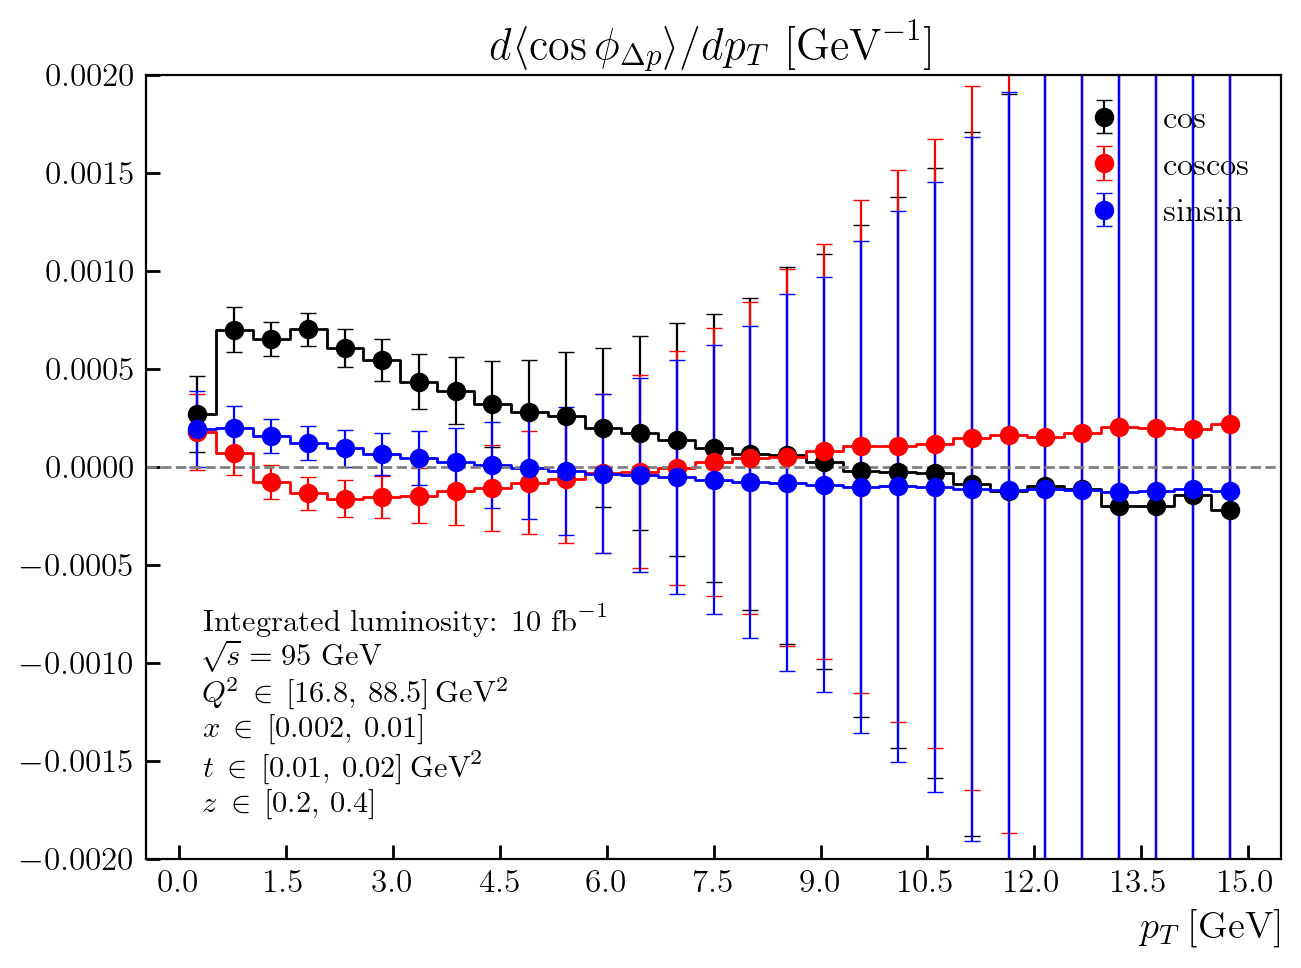

In [111]:
# plot relevant quantities 

Q_bins = np.linspace(6, 10.0, num=35)
pT_bins = np.linspace(0, 15.0, num=30)
phi_bins = [i/(2*np.pi) for i in range(15)]

lumi = 10
Q_min = 4.0
Q_max = 9.5
y_min = 0.4
y_max = 0.5
z_min = 0.2
z_max = 0.4
x_min = 0.00001
x_max = 0.01
t_min = 0.01
t_max = 0.02

cuts = {
        # 'Q': [Q_min, Q_max],
        # 'pT': [2.5, 3.5]
        # 'y': [y_min, y_max],
        'z': [z_min, z_max],
        # 'x': [x_min, x_max],
        't': [t_min, t_max]
        }

cdata = []
labels = ['test']
for df in mc_dfs:
    tdata, cdf = cut_data(df, 'pT', cuts, bins=pT_bins, lumi=lumi)
    cdata.append(tdata)

labels = ['cos', 'coscos', 'sinsin']
tag = 'DNS'
plot_histogram(cdata, cdf, ['cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)'],
               labels = labels,
               efficiency = 1, 
               # y_scale='log', 
               # x_scale='log',
               # x_limits = [5, 11], 
               bins = pT_bins,
               y_limits = [-0.002, 0.002],
               # one_line = True,
               zero_line = True,
               # plot_ratio=False,
                # rel_error=True,
               info_box = True,
               roots_label=True,
               title=r'$d \langle  \cos \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
               # title=r'$\delta_{\mathrm{rel.}}  \langle  \cos \phi_{\Delta p}  \rangle $',
               x_label=r'$p_T\, [\mathrm{GeV}]$',
               saveas = f'plots/cos_{tag}.pdf'
              )


np.save('predictions/dsa_mc.npy', cdata, allow_pickle=True)
    

# for different center of mass energies
# labels = []
# for irs, rs in enumerate(rs_arr): 
#     # if rs not in ['55', '85', '115']: continue
#     if rs not in ['55', '95']: continue

#     labels.append(rf'$\sqrt{{s}} = {rs} \, \mathrm{{GeV}}$')
#     tdata, cdf = cut_data(mc_df[rs], 'pT', ['<cos(phi_Dp)>','<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>'], cuts, bins=pT_bins, lumi=lumi)
#     cdata.append(tdata)
# tag = 'roots'


# for different trials
# labels = []
# for irep in range(len(mcfiles)):
#     labels.append(rf'replica ${irep}$')
    
#     tdata, cdf = cut_data(mc_df[f'trial {irep}'], 'pT', ['<cos(phi_Dp)>','<cos(phi_Dp)cos(phi_kp)>', '<sin(phi_Dp)sin(phi_kp)>'], cuts, bins=pT_bins, lumi=lumi)
#     cdata.append(tdata)
# tag = 'trials'



# plot_histogram(cdata, cdf, ['<cos(phi_Dp)>'], 
#                lumi = lumi,
#                labels = labels,
#                efficiency = 1, 
#                # y_scale='log', 
#                # x_scale='log',
#                # x_limits = [5, 11], 
#                bins = pT_bins,
#                y_limits = [-0.01, 0.01],
#                # one_line = True,
#                zero_line = True,
#                 # rel_error=True,
#                info_box = True,
#                roots_label=True,
#                title=r'$d \langle  \cos \phi_{\Delta p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
#                # title=r'$\delta_{\mathrm{rel.}}  \langle  \cos \phi_{\Delta p}  \rangle $',
#                x_label=r'$p_T\, [\mathrm{GeV}]$',
#                saveas = f'plots/cos_{tag}.pdf'
#               )


# plot_histogram(cdata, cdf, ['<cos(phi_Dp)cos(phi_kp)>'], 
#                lumi = lumi,
#                labels = labels,
#                efficiency = 1, 
#                # y_scale='log', 
#                # x_scale='log',
#                # x_limits = [5, 11], 
#                bins = pT_bins,
#                y_limits = [-0.01, 0.01],
#                # one_line = True,
#                zero_line = True,
#                 # rel_error=True,
#                info_box = True,
#                roots_label=True,
#                title=r'$d \langle  \cos \phi_{\Delta p} \cos \phi_{k p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
#                # title=r'$\delta_{\mathrm{rel.}} \langle   \cos \phi_{\Delta p} \cos \phi_{k p}  \rangle $',
#                x_label=r'$p_T\, [\mathrm{GeV}]$',
#                saveas = f'plots/coscos_{tag}.pdf'
#               )



# plot_histogram(cdata, cdf, ['<sin(phi_Dp)sin(phi_kp)>'], 
#                lumi = lumi,
#                labels = labels,
#                efficiency = 1, 
#                # y_scale='log', 
#                # x_scale='log',
#                # x_limits = [5, 11], 
#                bins = pT_bins,
#                y_limits = [-0.01, 0.01],
#                # one_line = True,
#                zero_line = True,
#                 # rel_error=True,
#                info_box = True,
#                roots_label=True,
#                title=r'$d \langle  \sin \phi_{\Delta p} \sin \phi_{k p} \rangle /dp_T \,\,[\mathrm{GeV}^{-1}]$', 
#                # title=r'$\delta_{\mathrm{rel.}}  \langle  \sin \phi_{\Delta p} \sin \phi_{k p}  \rangle $',
#                x_label=r'$p_T\, [\mathrm{GeV}]$',
#                saveas = f'plots/sinsin_{tag}.pdf'
#               )


